Epoch:  100 Loss 84175.11097677612
Epoch:  200 Loss 492.7463208031783
Epoch:  300 Loss 251.92801981013693
Epoch:  400 Loss 477.38718480840873
Epoch:  500 Loss 580.1441409297047
Epoch:  600 Loss 168.44187590978225
Epoch:  700 Loss 60.736304219016965
Epoch:  800 Loss 50.246565230040204
Epoch:  900 Loss 44.58261880508677
Epoch:  1000 Loss 40.82190345225299
Epoch:  1100 Loss 38.635920510186786
Epoch:  1200 Loss 37.59400395860728
Epoch:  1300 Loss 36.41043745334799
Epoch:  1400 Loss 34.928592202722186
Epoch:  1500 Loss 33.8414179573996
Epoch:  1600 Loss 32.74644715915123
Epoch:  1700 Loss 31.611125755791218
Epoch:  1800 Loss 30.33793378298703
Epoch:  1900 Loss 29.166165146216642
Epoch:  2000 Loss 28.044480028392385
Epoch:  2100 Loss 27.128482171178412
Epoch:  2200 Loss 26.21485736209545
Epoch:  2300 Loss 25.416006495150654
Epoch:  2400 Loss 25.41580429688336
Epoch:  2500 Loss 24.76196878395457
Epoch:  2600 Loss 24.237210417054534
Epoch:  2700 Loss 23.788085493432206
Epoch:  2800 Loss 22.472

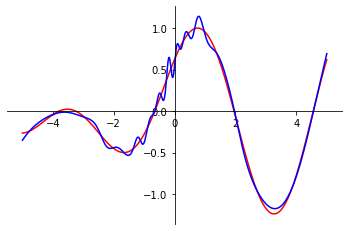

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  8 16:51:50 2021

@author: RafaĹ Biedrzycki
Kodu tego mogÄ uĹźywaÄ moi studenci na Äwiczeniach z przedmiotu WstÄp do Sztucznej Inteligencji.
Kod ten powstaĹ aby przyspieszyÄ i uĹatwiÄ pracÄ studentĂłw, aby mogli skupiÄ siÄ na algorytmach sztucznej inteligencji. 
Kod nie jest wzorem dobrej jakoĹci programowania w Pythonie, nie jest rĂłwnieĹź wzorem programowania obiektowego, moĹźe zawieraÄ bĹÄdy.

Nie ma obowiÄzku uĹźywania tego kodu.
"""

import numpy as np

#ToDo tu prosze podac pierwsze cyfry numerow indeksow
p = [1,0]

L_BOUND = -5
U_BOUND = 5

def q(x):
    return np.sin(x*np.sqrt(p[0]+1))+np.cos(x*np.sqrt(p[1]+1))

x_np_arr = np.array([np.linspace(L_BOUND, U_BOUND, 500)])
x = x_np_arr[0]

y = q(x)

np.random.seed(1)


# f logistyczna jako przykĹad sigmoidalej
def sigmoid(x):
    return 1/(1+np.exp(-x))

#pochodna fun. 'sigmoid'
def d_sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s * (1-s)
     
#f. straty
def nloss(y_out, y):
    return (y_out - y) ** 2

#pochodna f. straty
def d_nloss(y_out, y):
    return 2*( y_out - y )
    
class DlNet:
    def __init__(self, x, y, LR, HIDDEN_L_SIZE):
        self.x = x
        self.y = y
        
        self.HIDDEN_L_SIZE = HIDDEN_L_SIZE
        self.LR = LR

        self.y_out = 0
        self.y1 = np.zeros((self.HIDDEN_L_SIZE))
        
        #Params initalization with random values
        self.hidden_weights = np.random.normal(size=(self.HIDDEN_L_SIZE)) * 10
        self.hidden_bias = np.random.normal(size=(self.HIDDEN_L_SIZE)) * 10
        self.output_weights = np.random.normal(size=(self.HIDDEN_L_SIZE)) * 10
        self.output_bias = np.random.normal() * 10

        self.d_hidden_bias = np.zeros(self.HIDDEN_L_SIZE)
        self.d_hidden_weights = np.zeros(self.HIDDEN_L_SIZE)
        self.d_output_bias = 0
        self.d_output_weights = np.zeros(self.HIDDEN_L_SIZE)
        
    #ToDo - Done     
    def forward(self, x):  
        self.y1 = sigmoid(self.hidden_weights * x + self.hidden_bias)
        self.y_out = sum(self.output_weights * self.y1) + self.output_bias

    #ToDo - done         
    def predict(self, x):    
        y1 = sigmoid(self.hidden_weights * x + self.hidden_bias)       
        return sum(self.output_weights * y1) + self.output_bias
        
    #ToDo - done
    def backward(self, x, y):
        
        # Backwards propagation into the output layer
        self.d_output_bias += d_nloss(self.y_out, y) 
        self.d_output_weights += d_nloss(self.y_out, y) * self.y1

        # Backwards propagation into the hidden layer
        dq_dy1 = d_nloss(self.y_out, y)           
        dq_ds = dq_dy1 * d_sigmoid(self.y1)    
        self.d_hidden_bias += dq_ds 

        dq_dy1 = d_nloss(self.y_out, y) * self.output_weights   
        dq_ds = dq_dy1 * d_sigmoid(self.y1) * x     
        self.d_hidden_weights += dq_ds
      

    #ToDo - done
    def train(self, x_set, y_set, iters, mini_batch_size):  
        loss = 0  
        for epoch in range(0, iters):

            indices = np.arange(len(x_set))
            np.random.shuffle(indices)

            mini_batches_count = len(indices) // mini_batch_size

            for mini_batch in range(mini_batches_count):
                self.d_output_bias = 0
                self.d_output_weights = np.zeros(len(self.output_weights))
                self.d_hidden_bias = np.zeros(len(self.output_weights))
                self.d_hidden_weights = np.zeros(len(self.hidden_weights))

                range_start = mini_batch_size * mini_batch
                range_end = range_start + mini_batch_size

                for i in indices[range_start:range_end]:
                    self.forward(x_set[i])
                    self.backward(x_set[i], y_set[i])
                    loss += nloss(self.y_out, y_set[i])

                proportion = self.LR / len(indices[range_start:range_end])

                self.output_bias -= self.d_output_bias * proportion
                self.output_weights -= self.d_output_weights * proportion
                self.hidden_bias -= self.d_hidden_bias * proportion
                self.hidden_weights -= self.d_hidden_weights * proportion

            if epoch and not epoch % 100:
                print('Epoch: ', epoch, 'Loss', loss/100)
                loss = 0
            
y = y/np.max(y)

nn = DlNet(x,y, 0.01, 80)
nn.train(x, y, 15000, 50)

yh = [nn.predict(input) for input in x ] #ToDo tu umiesciÄ wyniki (y) z sieci

import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.plot(x,y, 'r')
plt.plot(x,yh, 'b')

plt.show()